In [1]:
import preprocess

In [2]:
tst = [2023, 8, 28, 'AM']
ted = [2023, 9, 6, 'AM']
region = ('CONUS', [-126.401171875,24.071240929282325,
                    -61.36210937500001,49.40003415463647])

In [3]:
import FireTime

list_of_ts = list(FireTime.t_generator(tst, ted))
list_of_ts

[[2023, 8, 28, 'AM'],
 [2023, 8, 28, 'PM'],
 [2023, 8, 29, 'AM'],
 [2023, 8, 29, 'PM'],
 [2023, 8, 30, 'AM'],
 [2023, 8, 30, 'PM'],
 [2023, 8, 31, 'AM'],
 [2023, 8, 31, 'PM'],
 [2023, 9, 1, 'AM'],
 [2023, 9, 1, 'PM'],
 [2023, 9, 2, 'AM'],
 [2023, 9, 2, 'PM'],
 [2023, 9, 3, 'AM'],
 [2023, 9, 3, 'PM'],
 [2023, 9, 4, 'AM'],
 [2023, 9, 4, 'PM'],
 [2023, 9, 5, 'AM'],
 [2023, 9, 5, 'PM'],
 [2023, 9, 6, 'AM']]

In [4]:
!tree ./processed

./processed

0 directories, 0 files


## Once per landcover file

If your landcover file is not in lat,lon then transform it and resave it. You will use this file a bunch later on.

In [5]:
preprocess.preprocess_landcover()

2024-01-25 09:33:56,727 - FireLog - INFO - func:preprocess_landcover took: 2.90 sec


## Once per region

Preprocess the region to get rid of static flare sources. Save that new "swiss cheese" shape off into a geojson file for later.

In [6]:
preprocess.preprocess_region(region)

2024-01-25 09:35:14,688 - FireLog - INFO - func:preprocess_region took: 1.27 min


In [7]:
!tree ./processed

./processed
└── CONUS.json

0 directories, 1 file


## Once per input file

Next process each NRT file into half day files. First we'll get all the times that are of interest. This could also be done by inspecting all looking at all the files that exist and seeing which have not been preprocessed yet.

In [8]:
%%time
for sat in ["SNPP", "NOAA20"]:
    for t in list_of_ts[::2]:
        preprocess.preprocess_NRT_file(t, sat)

2024-01-25 09:35:14,985 - FireLog - INFO - preprocessing NRT file for 2023-8-28, SNPP
2024-01-25 09:35:15,376 - FireLog - INFO - func:preprocess_NRT_file took: 391.06 ms
2024-01-25 09:35:15,377 - FireLog - INFO - preprocessing NRT file for 2023-8-29, SNPP
2024-01-25 09:35:15,705 - FireLog - INFO - func:preprocess_NRT_file took: 328.23 ms
2024-01-25 09:35:15,705 - FireLog - INFO - preprocessing NRT file for 2023-8-30, SNPP
2024-01-25 09:35:16,048 - FireLog - INFO - func:preprocess_NRT_file took: 342.58 ms
2024-01-25 09:35:16,049 - FireLog - INFO - preprocessing NRT file for 2023-8-31, SNPP
2024-01-25 09:35:16,390 - FireLog - INFO - func:preprocess_NRT_file took: 341.22 ms
2024-01-25 09:35:16,391 - FireLog - INFO - preprocessing NRT file for 2023-9-1, SNPP
2024-01-25 09:35:16,784 - FireLog - INFO - func:preprocess_NRT_file took: 392.99 ms
2024-01-25 09:35:16,785 - FireLog - INFO - preprocessing NRT file for 2023-9-2, SNPP
2024-01-25 09:35:17,273 - FireLog - INFO - func:preprocess_NRT_fil

CPU times: user 7.29 s, sys: 196 ms, total: 7.48 s
Wall time: 7.5 s


In [9]:
!tree ./processed

./processed
├── CONUS.json
├── NOAA20
│   ├── 20230828_AM.txt
│   ├── 20230828_PM.txt
│   ├── 20230829_AM.txt
│   ├── 20230829_PM.txt
│   ├── 20230830_AM.txt
│   ├── 20230830_PM.txt
│   ├── 20230831_AM.txt
│   ├── 20230831_PM.txt
│   ├── 20230901_AM.txt
│   ├── 20230901_PM.txt
│   ├── 20230902_AM.txt
│   ├── 20230902_PM.txt
│   ├── 20230903_AM.txt
│   ├── 20230903_PM.txt
│   ├── 20230904_AM.txt
│   ├── 20230904_PM.txt
│   ├── 20230905_AM.txt
│   ├── 20230905_PM.txt
│   ├── 20230906_AM.txt
│   └── 20230906_PM.txt
└── SNPP
    ├── 20230828_AM.txt
    ├── 20230828_PM.txt
    ├── 20230829_AM.txt
    ├── 20230829_PM.txt
    ├── 20230830_AM.txt
    ├── 20230830_PM.txt
    ├── 20230831_AM.txt
    ├── 20230831_PM.txt
    ├── 20230901_AM.txt
    ├── 20230901_PM.txt
    ├── 20230902_AM.txt
    ├── 20230902_PM.txt
    ├── 20230903_AM.txt
    ├── 20230903_PM.txt
    ├── 20230904_AM.txt
    ├── 20230904_PM.txt
    ├── 20230905_AM.txt
    ├── 20230905_PM.txt
    ├── 20230906_AM.txt
    └── 20230906_

## Once per region and t

Do initial filtering and clustering using the preprocessed region and the half day files.

Note: for the purpose of timing I am running the full month, but each of these steps could run in a separate proccess.

In [10]:
region = preprocess.read_region(region)

2024-01-25 09:35:22,994 - FireLog - INFO - func:read_region took: 190.18 ms


In [11]:
%%time
for t in list_of_ts:
    preprocess.preprocess_region_t(t, sat="VIIRS", region=region)

2024-01-25 09:35:22,998 - FireLog - INFO - filtering and clustering 2023-8-28 AM, VIIRS, CONUS
2024-01-25 09:35:23,021 - FireLog - INFO - func:read_preprocessed took: 21.62 ms
2024-01-25 09:35:23,047 - FireLog - INFO - func:read_preprocessed took: 25.51 ms
2024-01-25 09:36:32,649 - FireLog - INFO - func:do_clustering took: 377.49 ms
2024-01-25 09:36:32,675 - FireLog - INFO - func:preprocess_region_t took: 1.16 min
2024-01-25 09:36:32,676 - FireLog - INFO - filtering and clustering 2023-8-28 PM, VIIRS, CONUS
2024-01-25 09:36:32,708 - FireLog - INFO - func:read_preprocessed took: 31.57 ms
2024-01-25 09:36:32,741 - FireLog - INFO - func:read_preprocessed took: 31.73 ms
2024-01-25 09:37:18,713 - FireLog - INFO - func:do_clustering took: 15.92 ms
2024-01-25 09:37:18,726 - FireLog - INFO - func:preprocess_region_t took: 46.05 sec
2024-01-25 09:37:18,726 - FireLog - INFO - filtering and clustering 2023-8-29 AM, VIIRS, CONUS
2024-01-25 09:37:18,743 - FireLog - INFO - func:read_preprocessed too

CPU times: user 12min 49s, sys: 784 ms, total: 12min 50s
Wall time: 12min 52s


In [12]:
!tree ./processed

./processed
├── CONUS.json
├── NOAA20
│   ├── 20230828_AM.txt
│   ├── 20230828_PM.txt
│   ├── 20230829_AM.txt
│   ├── 20230829_PM.txt
│   ├── 20230830_AM.txt
│   ├── 20230830_PM.txt
│   ├── 20230831_AM.txt
│   ├── 20230831_PM.txt
│   ├── 20230901_AM.txt
│   ├── 20230901_PM.txt
│   ├── 20230902_AM.txt
│   ├── 20230902_PM.txt
│   ├── 20230903_AM.txt
│   ├── 20230903_PM.txt
│   ├── 20230904_AM.txt
│   ├── 20230904_PM.txt
│   ├── 20230905_AM.txt
│   ├── 20230905_PM.txt
│   ├── 20230906_AM.txt
│   └── 20230906_PM.txt
├── SNPP
│   ├── 20230828_AM.txt
│   ├── 20230828_PM.txt
│   ├── 20230829_AM.txt
│   ├── 20230829_PM.txt
│   ├── 20230830_AM.txt
│   ├── 20230830_PM.txt
│   ├── 20230831_AM.txt
│   ├── 20230831_PM.txt
│   ├── 20230901_AM.txt
│   ├── 20230901_PM.txt
│   ├── 20230902_AM.txt
│   ├── 20230902_PM.txt
│   ├── 20230903_AM.txt
│   ├── 20230903_PM.txt
│   ├── 20230904_AM.txt
│   ├── 20230904_PM.txt
│   ├── 20230905_AM.txt
│   ├── 20230905_PM.txt
│   ├── 20230906_AM.txt
│   └── 20230906_

## Use FireRun test

In [1]:
from FireRun import CONUSrunNRT

allfires = CONUSrunNRT()

2024-01-25 13:07:40,822 - FireLog - INFO - STARTING RUN FOR CONUS
2024-01-25 13:07:41,000 - FireLog - INFO - func:read_region took: 176.93 ms
2024-01-25 13:07:41,002 - FireLog - INFO - --------------------
2024-01-25 13:07:41,002 - FireLog - INFO - Fire tracking at [2023, 8, 28, 'AM']
2024-01-25 13:07:41,009 - FireLog - INFO - func:read_preprocessed took: 6.77 ms
2024-01-25 13:07:42,561 - FireLog - INFO - func:Fire_expand_rtree took: 1.55 sec
2024-01-25 13:07:42,963 - FireLog - INFO - func:Fire_merge_rtree took: 399.31 ms
2024-01-25 13:07:42,968 - FireLog - INFO - func:invalidate_statfires took: 4.36 ms
2024-01-25 13:07:42,968 - FireLog - INFO - fids_expand: 0
2024-01-25 13:07:42,968 - FireLog - INFO - fids_new: 507
2024-01-25 13:07:42,968 - FireLog - INFO - fids_merged: 50
2024-01-25 13:07:42,969 - FireLog - INFO - fids_invalid: 107
2024-01-25 13:07:42,969 - FireLog - INFO - func:Fire_Forward_one_step took: 1.97 sec
2024-01-25 13:07:42,969 - FireLog - INFO - --------------------
2024-

From the logs that Eli shared we expect that for [2023, 9, 6, 'AM'] we should have:

```python
actual_fids_expand = 260
actual_fids_new = 131
actual_fids_merged = 6
actual_fids_invalid = 44
```

In [2]:
allfires

<Allfires at t=[2023, 9, 6, 'AM'] with n_fires=4316>

Find a big fire

In [3]:
{fid: fire.n_pixels for fid, fire in allfires.fires.items() if fire.n_pixels > 1000}

{305: 2195, 306: 2118, 308: 1445}

In [4]:
allfires.fires[305].pixels

,Lat,Lon,FRP,Sat,DT,DS,YYYYMMDD_HHMM,ampm,x,y,initial_cid,uuid,new_at
0,41.88437,-123.77304,0.75,SNPP,0.37,0.41,2023-08-28 10:21:00,AM,-1.934391e+06,-62423.905336,305,e3d1e836-e3be-4e50-943a-b553ecb7bcf7,2023-08-28 00:00:00
1,41.88103,-123.77412,0.75,SNPP,0.37,0.41,2023-08-28 10:21:00,AM,-1.934579e+06,-62758.426061,305,44e49d27-75a9-4acf-b5b8-60cc12d42dc0,2023-08-28 00:00:00
2,41.88322,-123.76897,1.53,SNPP,0.37,0.41,2023-08-29 10:02:00,AM,-1.934107e+06,-62644.852284,316,7ca03b50-8a54-4d37-aa47-988d53965062,2023-08-29 00:00:00
3,41.88047,-123.77477,1.30,SNPP,0.37,0.41,2023-08-29 10:02:00,AM,-1.934648e+06,-62803.345473,316,48a4bf27-de51-4898-86ba-0320f945bf6f,2023-08-29 00:00:00
4,41.88233,-123.76907,1.02,SNPP,0.45,0.42,2023-08-30 09:43:00,AM,-1.934143e+06,-62738.464534,325,18dc37a3-1f26-49bf-af38-684fd7b4b93d,2023-08-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,42.04241,-123.76663,101.11,SNPP,0.51,0.56,2023-09-01 20:29:00,PM,-1.928970e+06,-45531.701141,199,353fb6c2-0290-4d07-873c-c7fa64bb2f53,2023-09-01 12:00:00
2191,42.04287,-123.78495,9.48,SNPP,0.51,0.56,2023-09-01 20:29:00,PM,-1.930389e+06,-45046.597397,200,68019bed-1c82-4d4b-85a2-568c4b57fc4d,2023-09-01 12:00:00
2192,42.03799,-123.78424,9.48,SNPP,0.51,0.56,2023-09-01 20:29:00,PM,-1.930486e+06,-45589.736159,200,796efa6b-828c-446c-a36b-1a281a40d822,2023-09-01 12:00:00
2193,42.01171,-123.90869,6.40,NOAA20,0.37,0.41,2023-09-01 21:21:00,PM,-1.941048e+06,-45455.644723,318,a6be93f9-816c-4ee5-bad7-5a53d9ab53e9,2023-09-01 12:00:00


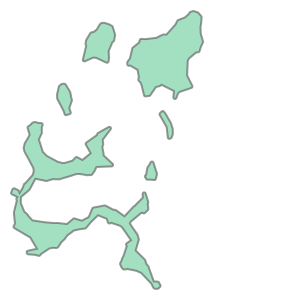

In [5]:
allfires.fires[305].hull

## Experiments with saving fire data

In [12]:
%%time

from FireConsts import firesrc
import os
OUTPUT_DIR = "processed/"

for fid, fire in allfires.fires.items():
    fire_filename = f"{fid=}.txt"
    output_filepath = os.path.join(OUTPUT_DIR, firesrc, region[0], "fires", fire_filename)
    
    # make nested path if necessary
    os.makedirs(os.path.dirname(output_filepath), exist_ok=True)

    fire.pixels.to_csv(output_filepath, index=False)

CPU times: user 1.72 s, sys: 156 ms, total: 1.87 s
Wall time: 1.87 s


## Experiments with land cover

In [ ]:
from FireConsts import dirextdata

import rasterio
import pyproj
import os

In [ ]:
%%time
# read NLCD 500m data
fnmLCT = os.path.join(dirextdata, "NLCD", f"nlcd_export_510m_simplified_latlon.tif")
dataset = rasterio.open(fnmLCT)
samps = list(dataset.sample(fire.newlocs_geo))
vLCT = [s[0] for s in samps]
vLCT

In [ ]:
%%time
# read NLCD 500m data
fnmLCT = os.path.join(dirextdata, "NLCD", f"nlcd_export_510m_simplified_{epsg}.tif")
dataset = rasterio.open(fnmLCT)
samps = list(dataset.sample(fire.newlocs))
vLCT = [s[0] for s in samps]
vLCT

In [ ]:
%%time

locs = fire.newlocs_geo
# read NLCD 500m data
fnmLCT = os.path.join(dirextdata, "NLCD", "nlcd_export_510m_simplified.tif")
dataset = rasterio.open(fnmLCT)
transformer = pyproj.Transformer.from_crs("epsg:4326", dataset.crs)
locs_crs_x, locs_crs_y = transformer.transform(
    # NOTE: EPSG 4326 expected coordinate order latitude, longitude, but
    # `locs` is x (longitude), y (latitude). That's why `l[1]`, then `l[0]`
    # here.
    [l[1] for l in locs],
    [l[0] for l in locs]
)
locs_crs = list(zip(locs_crs_x, locs_crs_y))
samps = list(dataset.sample(locs_crs))
vLCT = [int(s) for s in samps]
vLCT

## Experiments with hulls

Trying out next steps around hulls:

In [ ]:
from FireObj import Cluster, FirePixel
from FireVector import *

In [ ]:
%%time
for d in range(1, 32):
    for ampm in ("AM", "PM"):
        df = read_preprocessed((t[0], t[1], d, ampm), sat, region=region)
        for ic, pixels in df.groupby("initial_cid"):
            hull = cal_hull(pixels[["x", "y"]].values, sensor="viirs")

In [ ]:
biggest_cluster = df.value_counts("initial_cid").index[0]
pixels = df[df["initial_cid"] == biggest_cluster].copy()
pixel_locs = pixels[["x", "y"]].values
hull = cal_hull(pixel_locs, sensor="viirs")

In [ ]:
from utils import timed

In [ ]:
# compute initial hulls
hulls = dict()
for ic, subset in df.groupby("initial_cid"):
    pixel_locs = subset[["x", "y"]].values
    hulls[ic] = cal_hull(pixel_locs, sensor="viirs")

# store hulls
df = pd.merge(df, pd.Series(hulls, name="hull"), how="outer", left_on="initial_cid", right_index=True)